# Irrigation Machine: Multi-label Classification

A farm field has an array of 20 sensors distributed along 3 crop fields, as shown below. These sensors measure, among other things, the humidity of the soil, radiation of the sun, etc. Your task is to use the combination of measurements of these sensors to decide which parcels to water, given each parcel has different environmental requirements. You're going to automate the watering of farm parcels by making an intelligent irrigation machine. 

<img src='data/irrigation_machine.png' width="400" height="200" align="center"/>

Each sensor measures an integer value between 0 and 13 volts. Parcels can be represented as one-hot-encoded vectors of length 3, where each index is one of the parcels. **Note:** Parcels *can* be watered simultaneously.

In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
irrigation = pd.read_csv('irrigation_machine.csv', index_col=0)
irrigation.head()

sensor_0  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  \
0       1.0       2.0       1.0       7.0       0.0       1.0       1.0   
1       5.0       1.0       3.0       5.0       2.0       2.0       1.0   
2       3.0       1.0       4.0       3.0       4.0       0.0       1.0   
3       2.0       2.0       4.0       3.0       5.0       0.0       3.0   
4       4.0       3.0       3.0       2.0       5.0       1.0       3.0   

   sensor_7  sensor_8  sensor_9  ...  sensor_13  sensor_14  sensor_15  \
0       4.0       0.0       3.0  ...        8.0        1.0        0.0   
1       2.0       3.0       1.0  ...        4.0        5.0        5.0   
2       6.0       0.0       2.0  ...        3.0        3.0        1.0   
3       2.0       2.0       5.0  ...        4.0        1.0        1.0   
4       1.0       1.0       2.0  ...        1.0        3.0        2.0   

   sensor_16  sensor_17  sensor_18  sensor_19  parcel_0  parcel_1  parcel_2  
0        2.0        1.0        9.0        2.0         0         1         0  
1        2.0        2.0        2.0        7.0         0         0         0  
2        0.0        3.0        1.0        0.0         1         1         0  
3        4.0        1.0        3.0        2.0         0         0         0  
4        2.0        1.0        1.0        0.0         1         1         0  

[5 rows x 23 columns]

### Define a model
Multi-label classification problems differ from multi-class problems in that each observation can be labeled with zero or more classes. So classes/labels are not mutually exclusive, and you could water all, none, or any combination of farm parcels based on the inputs.

To account for this behavior, the output layer will have as many neurons as there are classes. But, unlike in multi-class problems, each output neuron has a `sigmoid` activation function. This makes each neuron in the output layer able to output a number between 0 and 1 independently. Also note that the output probabilities *do not need to add up to 1*, due to each outcome's independence from the others. 

In [6]:
# Instantiate a Sequential model
model = tf.keras.Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(20,)))

# Add an output layer of 3 neurons with sigmoid activation
model.add(tf.keras.layers.Dense(3, activation='sigmoid'))

# Compile your model with binary crossentropy loss
model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


### Prepare the dataset
Separate the dataset into features (sensors) and labels (parcels). Once separated, further split each category into training and testing sets and convert them to a format that can be accepted by the model defined above. Make sure to also include a validation split in the model fitting and run for 100 epochs.

In [7]:
parcels = irrigation[['parcel_0', 'parcel_1', 'parcel_2']].to_numpy()
sensors = irrigation.drop(['parcel_0', 'parcel_1', 'parcel_2'], axis=1).to_numpy()

In [9]:
sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors, parcels, test_size=0.3, 
                                                                            stratify=parcels)

### Fit the model

In [ ]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.2)

### Predict

In [10]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

2022-01-18 14:16:56.820428: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/100
35/35 [==============================] - 0s 6ms/step - loss: 0.6105 - accuracy: 0.4676 - val_loss: 0.5019 - val_accuracy: 0.5286
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.5519 - val_loss: 0.4284 - val_accuracy: 0.5893
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.5629 - val_loss: 0.3889 - val_accuracy: 0.5500
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.6028 - val_loss: 0.3571 - val_accuracy: 0.5714
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.5822 - val_loss: 0.3334 - val_accuracy: 0.6179
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.5940 - val_loss: 0.3179 - val_accuracy: 0.6429
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2904 - accuracy: 0.6132 - val_loss: 0.3044 - val_accuracy: 0.5571
Epoch 8/100
3

Epoch 59/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1447 - accuracy: 0.5833 - val_loss: 0.2526 - val_accuracy: 0.5750
Epoch 60/100
35/35 [==============================] - 0s 1ms/step - loss: 0.1527 - accuracy: 0.6088 - val_loss: 0.2520 - val_accuracy: 0.6179
Epoch 61/100
35/35 [==============================] - 0s 1ms/step - loss: 0.1444 - accuracy: 0.6159 - val_loss: 0.2593 - val_accuracy: 0.6036
Epoch 62/100
35/35 [==============================] - 0s 1ms/step - loss: 0.1448 - accuracy: 0.6263 - val_loss: 0.2549 - val_accuracy: 0.5750
Epoch 63/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1438 - accuracy: 0.5550 - val_loss: 0.2605 - val_accuracy: 0.6786
Epoch 64/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1427 - accuracy: 0.6673 - val_loss: 0.2584 - val_accuracy: 0.6071
Epoch 65/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.6087 - val_loss: 0.2555 - val_accuracy: 0.6250
Epoch 

### Evaluate on the test data

In [11]:
# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

19/19 [==============================] - 0s 648us/step - loss: 0.2610 - accuracy: 0.6133
Accuracy: 0.6133333444595337


### Callbacks
Let's improve this model's performance using Keras callbacks. A **callback** is a function that is executed after some other function, event, or task has finished. A Keras callback is a block of code that gets executed after each epoch during training or after the training is finished. Examples of Keras callbacks include: `EarlyStopping`, `ModelCheckpoint`, and `History`.

In [13]:
def plot_accuracy(acc,val_acc):
    # Plot training & validation accuracy values
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

In [14]:
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')

In [15]:
X_train, y_train = sensors_train, parcels_train
X_test, y_test = sensors_test, parcels_test

In [16]:
# Train your model and save its history
h_callback = model.fit(X_train, y_train, epochs = 50,
               validation_data=(X_test, y_test))

Epoch 1/50
44/44 [==============================] - 0s 3ms/step - loss: 0.1486 - accuracy: 0.5929 - val_loss: 0.2576 - val_accuracy: 0.5983
Epoch 2/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1450 - accuracy: 0.5986 - val_loss: 0.2556 - val_accuracy: 0.6300
Epoch 3/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.5979 - val_loss: 0.2558 - val_accuracy: 0.6367
Epoch 4/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1395 - accuracy: 0.5979 - val_loss: 0.2510 - val_accuracy: 0.6083
Epoch 5/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1369 - accuracy: 0.5850 - val_loss: 0.2588 - val_accuracy: 0.6067
Epoch 6/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1371 - accuracy: 0.5864 - val_loss: 0.2565 - val_accuracy: 0.5767
Epoch 7/50
44/44 [==============================] - 0s 2ms/step - loss: 0.1371 - accuracy: 0.5857 - val_loss: 0.2538 - val_accuracy: 0.5817
Epoch 8/50
44/44 [==

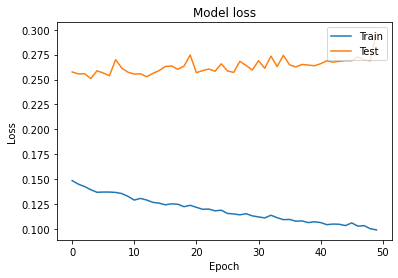

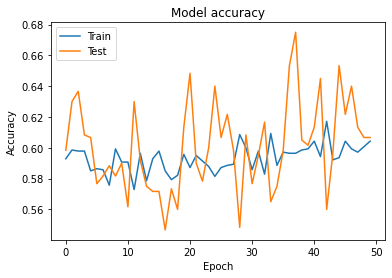

In [20]:
# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

<img src='data/one_vs_rest.png' width="400" height="200" align="center"/>